# Exploratory Data Analysis on Bundesliga 2021-2022 dataset

My project is about performing Exploratory Data Analysis on a Bundelisga dataset with numbers from the season 2021/2022. Before starting the analysis part, I will do important steps such as discovery, cleaning and transformation.  

## Data collection

> The data I used for my project comes **API Football** (https://www.api-football.com/), which provides football data for multiple competitions from various countries. I requested the players' data from the Bundesliga (players by league id) from the API through Google sheets, using an API connector. API Football provides guidance about this process. I then transferred the data from Google sheets to an Excel file, where I made a couple of modifications such as reordering and renaming columns, adding and removing rows or manually inputting data. 

### Dataset issues

> When I went through the dataset in Excel, I noticed that there was some missing data which is common. However, as a football fan I noticed that in several teams, some key players having significant stats did not appear in the dataset. Furthermore, there were players in the dataset that did not play any games so all of the columns had null or 0 values. These were two big issues. For the players who did not have any single appearance, I deleted their rows. To include key players that were missing, I had to request different data from API Football. Through Google sheets, I retrieved the data of players by team id (each team has an id). This allowed me to find in each team, the key players (and their stats) that were missing in the original dataset. I copied the rows of these players and pasted them into the Excel dataset. 

### Importing necessary libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Loading and discovering the dataset

In [2]:
#loading dataset 
df= pd.read_csv(r"C:\Users\user\Desktop\Robin\Portfolio projects\EDA Bundesliga 2021-2022\BDA player statistics 2021-2022.csv")

In [3]:
#checking dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Columns: 101 entries, player id to  Team 2.penalty saved
dtypes: bool(2), float64(55), int64(17), object(27)
memory usage: 401.0+ KB


The result aboves shows that the dataset has 517 rows and 101 columns. The first column name is 'player id' and the last column name is 'Team2. penalty saved'

In [4]:
#printing first five rows
df.head()

,player id,name,firstname,lastname,age,birth date,birth place,birth country,nationality,height,...,Team 2.fouls drawn,Team 2.fouls committed,Team 2.cards yellow,Team 2.cards yellowred,Team 2.cards red,Team 2.penalty won,Team 2.penalty conceded,Team 2.penalty scored,Team 2.penalty missed,Team 2.penalty saved
0,22,Jacob Bruun Larsen,Jacob,Bruun Larsen,24,19-09-98,Lyngby,Denmark,Denmark,183 cm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,416,Sebastian Rudy,Sebastian,Rudy,32,28-02-90,Villingen-Schwenningen,Germany,Germany,180 cm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,705,Ermin Bičakčić,Ermin,Bičakčić,32,24-01-90,Zvornik,Bosnia and Herzegovina,Bosnia and Herzegovina,185 cm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,708,Benjamin Hübner,Benjamin,Hübner,33,04-07-89,Wiesbaden,Germany,Germany,193 cm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,709,Pavel Kadeřábek,Pavel,Kadeřábek,30,25-04-92,Praha,Czech Republic,Czech Republic,182 cm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#get all columns names
df.columns.values.tolist()

['player id',
 'name',
 'firstname',
 'lastname',
 'age',
 'birth date',
 'birth place',
 'birth country',
 'nationality',
 'height',
 'weight',
 'position',
 'team id',
 'team name',
 'appearances',
 'Starter',
 ' bench',
 'substituted in',
 'substituted out',
 'total minutes played',
 'player rating',
 'injured',
 'photo',
 'team logo',
 'league id',
 'league name',
 'league country',
 'league logo',
 'league flag',
 'league season',
 'games number',
 ' captain',
 'shots total',
 'shots on target',
 'total goals',
 'goals conceded',
 ' assists',
 'total saves',
 'total passes',
 'successful tackles',
 'dribbled past',
 ' blocks',
 ' interceptions',
 'duels total',
 'duels won',
 'dribbles attempts',
 'dribbles success',
 'fouls drawn',
 'fouls committed',
 'yellow cards',
 'cards yellowred',
 'cards red',
 'penalty won',
 'penalty conceded',
 'penalty scored',
 'penalty missed',
 'penalty saved',
 ' Team 2.team id',
 ' Team 2.position',
 ' Team 2.team name',
 ' Team 2.appearances',
 

The code above displays all of the columns' names. Players are loaned most often during the course of the season in January. They can also be loaned or definitively transferred during the 1st transfer window that occurs in August of the previous year. Therefore, loaned or transferred players have their stats collected for the 2 teams that they played for during the current season. The columns starting with "**Team 2**" shows the players stats for the club they were loaned or transferred and the columns that don't start with "**Team 2**" represent the stats for the team they were loaned or transferred to. 

Below there is a description of columns for which the meaning might be difficult to understand:

**'bench':** Number of times the player has been on the bench.

**'yellowred':** Number of times the player received two yellows that led to a red card.





In [6]:
#displaying the players who played for two different teams during the season
two_teams=df.loc[df[' Team 2.team id'].notnull(),['player id', 'name', 'position']]
two_teams

,player id,name,position
12,126949,C. Richards,Defender
154,24839,Marvin Friedrich,Defender
197,161922,Ansgar Knauff,Attacker
243,108474,L Kilian,Defender
253,1941,Marcus Ingvartsen,Attacker
299,26301,Marc Oliver Kempf,Defender
341,1159,M. Sabitzer,Midfielder
379,24905,Sebastian Griesbeck,Midfielder
414,26237,Dominique Heintz,Defender
445,81573,Omar Marmoush,Attacker


## Data cleaning and transformation

In [7]:
#removing left whitespaces in column names
df.rename(columns=lambda x:x.lstrip(),inplace=True)
#verifiying updated columns names
df.columns.values.tolist()

['player id',
 'name',
 'firstname',
 'lastname',
 'age',
 'birth date',
 'birth place',
 'birth country',
 'nationality',
 'height',
 'weight',
 'position',
 'team id',
 'team name',
 'appearances',
 'Starter',
 'bench',
 'substituted in',
 'substituted out',
 'total minutes played',
 'player rating',
 'injured',
 'photo',
 'team logo',
 'league id',
 'league name',
 'league country',
 'league logo',
 'league flag',
 'league season',
 'games number',
 'captain',
 'shots total',
 'shots on target',
 'total goals',
 'goals conceded',
 'assists',
 'total saves',
 'total passes',
 'successful tackles',
 'dribbled past',
 'blocks',
 'interceptions',
 'duels total',
 'duels won',
 'dribbles attempts',
 'dribbles success',
 'fouls drawn',
 'fouls committed',
 'yellow cards',
 'cards yellowred',
 'cards red',
 'penalty won',
 'penalty conceded',
 'penalty scored',
 'penalty missed',
 'penalty saved',
 'Team 2.team id',
 'Team 2.position',
 'Team 2.team name',
 'Team 2.appearances',
 'Team 2.s

In [8]:
#display the number of nulls values by column
pd.options.display.max_rows=115
df.isnull().sum()

player id                     0
name                          0
firstname                     0
lastname                      0
age                           0
birth date                    0
birth place                  55
birth country                 0
nationality                   0
height                       13
weight                       17
position                      0
team id                       0
team name                     0
appearances                   0
Starter                       0
bench                         0
substituted in                0
substituted out               0
total minutes played          0
player rating                14
injured                       0
photo                         0
team logo                     0
league id                     0
league name                   0
league country                0
league logo                   0
league flag                   0
league season                 0
games number                517
captain 

The result above shows that multiple columns do not have any values at all with 517 nulls (517 rows in the dataset). Therefore, I will be dropping these columns. In addition, I will also delete 'dribbled past' and 'Team2.dribbled past because originally they had all nulls values but I updated some them when I manually input data for individuals that plyed for two teams. These two columns only have data for 12 players so they won't be useful for my analysis. I am also going to delete other columns that I won't need such as team logo, league id, league season, league name and others.

In [9]:
#dropping columns
df.drop(['injured',
 'photo',
 'team logo',
 'league id',
 'league name',
 'league country',
 'league logo',
 'league flag',
 'league season',
 'games number',
 'captain','Team 2.player rating',
 'Team 2.team logo',
 'Team 2.league id',
 'Team 2.league name',
 'Team 2.league country',
 'Team 2.league logo',
 'Team 2.league flag',
 'Team 2.league season',
 'Team 2.games number',
 'Team 2.captain','Team 2.dribbled past','dribbled past','Team 2.penalty saved'], axis=1, inplace=True)

In [10]:
#displaying the new number of columns
len(df.columns)

77

In [11]:
#dropping two more columns 
df.drop(['Team 2.saves','Team 2.goals conceded'], axis=1, inplace=True)
len(df.columns)

75

In [12]:
#fill null values with value 0 for certain columns
df.fillna({'total saves':0, 'penalty saved':0})

,player id,name,firstname,lastname,age,birth date,birth place,birth country,nationality,height,...,Team 2.dribbles success,Team 2.fouls drawn,Team 2.fouls committed,Team 2.cards yellow,Team 2.cards yellowred,Team 2.cards red,Team 2.penalty won,Team 2.penalty conceded,Team 2.penalty scored,Team 2.penalty missed
0,22,Jacob Bruun Larsen,Jacob,Bruun Larsen,24,19-09-98,Lyngby,Denmark,Denmark,183 cm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,416,Sebastian Rudy,Sebastian,Rudy,32,28-02-90,Villingen-Schwenningen,Germany,Germany,180 cm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,705,Ermin Bičakčić,Ermin,Bičakčić,32,24-01-90,Zvornik,Bosnia and Herzegovina,Bosnia and Herzegovina,185 cm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,708,Benjamin Hübner,Benjamin,Hübner,33,04-07-89,Wiesbaden,Germany,Germany,193 cm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,709,Pavel Kadeřábek,Pavel,Kadeřábek,30,25-04-92,Praha,Czech Republic,Czech Republic,182 cm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,1095,X. Schlager,Xaver,Schlager,25,28-09-97,Linz,Austria,Austria,174 cm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
513,1302,Jonas Older Wind,Jonas,Older Wind,23,07-02-99,København,Denmark,Denmark,190 cm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
514,2809,R. Steffen,Renato,Steffen,31,03-11-91,Aarau,Switzerland,Switzerland,170 cm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
515,2918,K. Casteels,Koen,Casteels,30,25-06-92,Bonheiden,Belgium,Belgium,197 cm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The columns **total saves** and **penalty saved** only applies to Goalkeepers. That is why I filled the other players (defender, midfielder, attacker) with the value of 0 since they don't make any saves or penalty saves.

In [13]:
#counting duplicates of players
df['player id'].duplicated().sum()

10

In [14]:
#extracting duplicates of players
df.loc[df['player id'].duplicated(),['player id','name','team name','Team 2.team name']]

,player id,name,team name,Team 2.team name
140,984,J. Brandt,Borussia Dortmund,NaN
142,161919,Y. Moukoko,Borussia Dortmund,NaN
191,25455,A. Barkok,Eintracht Frankfurt,NaN
278,108474,L. Kilian,FSV Mainz 05,NaN
414,26237,Dominique Heintz,Union Berlin,SC Freiburg
422,24839,Marvin Friedrich,Union Berlin,NaN
423,24905,S. Griesbeck,Union Berlin,NaN
459,26301,M. Kempf,VfB Stuttgart,NaN
496,25329,Max Bennet Kruse,VfL Wolfsburg,Union Berlin
505,25458,Dodi Lukébakio,VfL Wolfsburg,Hertha Berlin


In [15]:
#dropping rows 278,422,423,459
df.drop([278,422,423,459], axis=0,inplace=True)

As I wrote in the introduction, I had to manually update and input some values into some columns in Excel. I therefore know that the 4 players concerned played for 2 different teams and that they are records of that in the table. Yet in the duplicates table above, the values for the column "Team2.team name" shows null for the 4 players. That's why I deleted the 4 rows.

Players on rows **414,496,505** played for two teams as you can see in the duplicated table above. I am going to keep these rows and delete their duplicates rows which show null values in the **"Team2. team name column"**.

In [16]:
#Select players from rows 414,496,505 and their duplicates
df.loc[(df['player id']==26237) | (df['player id']==25329) | (df['player id']==25458), ['player id','name','team name','Team 2.team name']]

,player id,name,team name,Team 2.team name
309,25458,D. Lukébakio,Hertha Berlin,NaN
369,26237,D. Heintz,SC Freiburg,NaN
414,26237,Dominique Heintz,Union Berlin,SC Freiburg
424,25329,M. Kruse,Union Berlin,NaN
496,25329,Max Bennet Kruse,VfL Wolfsburg,Union Berlin
505,25458,Dodi Lukébakio,VfL Wolfsburg,Hertha Berlin


In [17]:
#dropping rows 309,369 & 424
df.drop([309,369,424], axis=0,inplace=True)

In [18]:
#showing the remaining duplicates
df.loc[df['player id'].duplicated()]

,player id,name,firstname,lastname,age,birth date,birth place,birth country,nationality,height,...,Team 2.dribbles success,Team 2.fouls drawn,Team 2.fouls committed,Team 2.cards yellow,Team 2.cards yellowred,Team 2.cards red,Team 2.penalty won,Team 2.penalty conceded,Team 2.penalty scored,Team 2.penalty missed
140,984,J. Brandt,Julian,Brandt,26,02-05-96,Bremen,Germany,Germany,185 cm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142,161919,Y. Moukoko,Youssoufa,Moukoko,18,20-11-04,Yaoundé,Cameroon,Germany,179 cm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,25455,A. Barkok,Aymen,Barkok,24,21-05-98,Frankfurt am Main,Germany,Morocco,189 cm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


For the rows above and their duplicates, there can be differences in the values for some columns.It's always better to check first if the duplicates are identical (same values for columns) or distinct. 

In [19]:
#checking for duplicates that are identical
#verifying duplicates based on all columns instead of one
df.loc[df.duplicated()]

,player id,name,firstname,lastname,age,birth date,birth place,birth country,nationality,height,...,Team 2.dribbles success,Team 2.fouls drawn,Team 2.fouls committed,Team 2.cards yellow,Team 2.cards yellowred,Team 2.cards red,Team 2.penalty won,Team 2.penalty conceded,Team 2.penalty scored,Team 2.penalty missed
140,984,J. Brandt,Julian,Brandt,26,02-05-96,Bremen,Germany,Germany,185 cm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,25455,A. Barkok,Aymen,Barkok,24,21-05-98,Frankfurt am Main,Germany,Morocco,189 cm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The players with ids **984** and **25455** have each two rows in the dataset with identical values for each of the columns. I'll therefore drop the two rows above. In contrast, the player id **161919** (Y.Moukoko) has two distinct rows that I will compare to determine which one I will be keeping. 

In [20]:
#dropping rows 140 and 191
df.drop([140,191], axis=0,inplace=True)

In [21]:
df.loc[df['player id']== 161919]

,player id,name,firstname,lastname,age,birth date,birth place,birth country,nationality,height,...,Team 2.dribbles success,Team 2.fouls drawn,Team 2.fouls committed,Team 2.cards yellow,Team 2.cards yellowred,Team 2.cards red,Team 2.penalty won,Team 2.penalty conceded,Team 2.penalty scored,Team 2.penalty missed
128,161919,Youssoufa Moukoko,Youssoufa,Moukoko,18,20-11-04,Yaoundé,Cameroon,Germany,179 cm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142,161919,Y. Moukoko,Youssoufa,Moukoko,18,20-11-04,Yaoundé,Cameroon,Germany,179 cm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are little differences in values between the two rows for columns such as name, shots total, total passes, duels total, player rating. I have looked at passes and shots for the player concerned on WhoScored, a statistics's website and the values on the second row (**142**) matched the values on the website. As a result, I'll get rid of the first occurence of the player(**128**).

In [22]:
#keeping last occurence of player 16919 using keep argument, which at the same time deletes the other occurence of player
df.drop_duplicates(['player id'],keep='last',inplace=True)

In [23]:
#showing columns data type
df.dtypes

player id                     int64
name                         object
firstname                    object
lastname                     object
age                          object
birth date                   object
birth place                  object
birth country                object
nationality                  object
height                       object
weight                       object
position                     object
team id                       int64
team name                    object
appearances                   int64
Starter                       int64
bench                         int64
substituted in                int64
substituted out               int64
total minutes played          int64
player rating                object
shots total                 float64
shots on target             float64
total goals                   int64
goals conceded                int64
assists                     float64
total saves                 float64
total passes                

A lot of columns should have an integer type instead of float. A player can't have decimals in his number of passes, tackles or duels. But because these columns contains null, I won't be able to set them to integer type. However, it is not a problem since no players in the dataset actually has for instance 7.5 successful tackles or 5.3 shots total. The number after the decimal is always 0. On the other hand, I am going to change the 'player rating' column which has string data type to float. I will also fix the **Age** column which has a string data type instead of integer. I was not surprised by this as I saw in the Excel file that some values for this column were not integers but dates in the dd/mm/yy format. 

In [24]:
#creating a new column rating that takes the values of player rating column
df['rating']=df['player rating'].str.replace(' ','.')
#dropping player rating column
df.drop(['player rating'],axis=1,inplace=True)

I wanted to change the data type of the column **'player rating'** to float. However, I was getting an error due to the fact that some values in the column didn't contain a decimal point(e.g.7 019047). So I created a new column based on the **'player rating'** column that I named **'rating'** where I replaced any values with a space by a decimal point. In the new column, we have **7.019047** instead of 7 019047. I can therefore transofrm the new column **'rating'** type to float.

In [25]:
#set rating column type to float
df['rating']=df['rating'].astype('float')
df['rating'].dtype

dtype('float64')

In [26]:
#converting birth date column to datetime type
df['birth date']=df['birth date'].astype('datetime64')
df['birth date'].dtype

dtype('<M8[ns]')

In [27]:
#creating a new column
df['lastmatchdate']='14-05-22' #date of last matchday of the 2021-2022 season

#changing column's dtype to 'datetime'
df['lastmatchdate']=df['lastmatchdate'].astype('datetime64')

#setting age column values to 0 (some values are in dd-mm-yy format instead of integer so I am goign to recalculate the whole 
#column)
df['age']=0 

In [28]:
#recalculating age column
df['age']=df['lastmatchdate']-df['birth date']
df['age']=df.age/np.timedelta64(1,'Y')#get the difference between dates in years
df['age']


0      23.650041
1      32.206000
2      32.301827
3      33.101296
4      30.051267
         ...    
512    24.624736
513    22.866999
514    31.176547
515    29.884255
516    23.414581
Name: age, Length: 507, dtype: float64

In [29]:
#set age column's dtype to int
df['age']=df['age'].astype('int')
df['age']

0      23
1      32
2      32
3      33
4      30
       ..
512    24
513    22
514    31
515    29
516    23
Name: age, Length: 507, dtype: int32

The **'age'** column is now fixed with all values being integers.

## Exploratory Data Analysis

### Which were the ten most represented nationalities in the Bundesliga in the 2021-2022 season?

In [30]:
#get all the unique nationalities existing in the dataset
df['nationality'].nunique()

63

There was **63** different nationalities in the Bundesliga during the 2021-2022 season.

In [31]:
df2=df['nationality'].value_counts()

The method above **value_counts()**  returns the count of all unique values in the given column in descending order, without any null values. So if I print df2, I can see the top 10 nationalities represented in the Bundesliga. However, I want to represent the result using a bar graph. I'll do that in the cells below.

In [32]:
#taking the 10 most represented nationalities
df3=df2.head(11)
df3.sort_values(inplace=True)# sort data in ascending order to have descending order in horizontal barplot below

I took the first eleven rows because when I printed df2 in another notebook (a copy), I saw that there were 3 countries that had the same number of players: Croatia, Japan and Spain. Doing **df2.head(10)** would have excluded one of the them

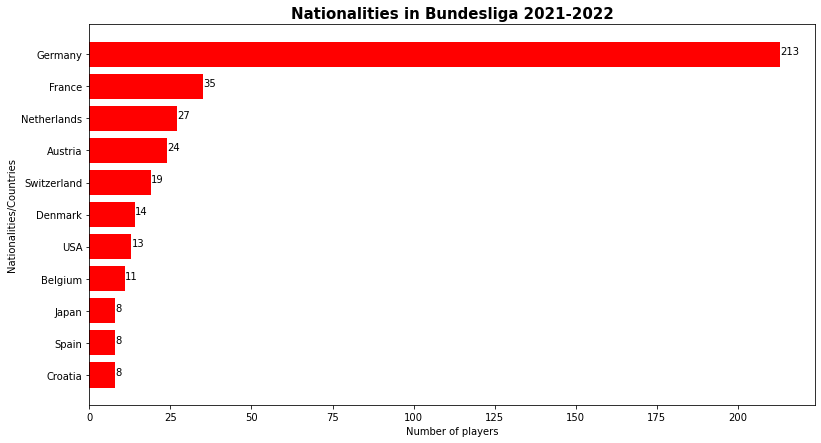

In [33]:
#creating a bar plot with the 10 most represented nationalities

nationalities= list(df3.keys())#take nationalities
pcount= list(df3.values)# take the number of players count
plt.figure(figsize= (13,7))
bars=plt.barh(nationalities,pcount, color='red')

#show values at the end of each bar
for index, value in enumerate(pcount):
    plt.text(value, index, str(value))

#setting axis and chart titles
plt.xlabel("Number of players")
plt.ylabel("Nationalities/Countries")
plt.title("Nationalities in Bundesliga 2021-2022",size=15,fontweight='bold')
plt.show()


Obviously, the most represented nation is **Germany** with **217** players followed by **France**, **Netherlands**, **Austria**, **Switzerland** respectively in the next 4 positions. 

### Which were the 5 youngest teams for the 2021-2022 season? Which team was the oldest?

To answer these questions, I am going to determine the average age of each team.

In [34]:
#calculating the average age by team
df4=df.groupby('team name')['age'].mean()

In [35]:
df5=pd.Series(df4)

In [36]:
#renaming Series object name
df5.rename('age avg',inplace=True)

team name
1899 Hoffenheim             26.000000
Arminia Bielefeld           25.538462
Bayer Leverkusen            24.758621
Bayern Munich               25.703704
Borussia Dortmund           24.750000
Borussia Monchengladbach    25.884615
Eintracht Frankfurt         26.538462
FC Augsburg                 26.269231
FC Koln                     25.800000
FSV Mainz 05                25.962963
Hertha Berlin               24.971429
RB Leipzig                  24.464286
SC Freiburg                 25.720000
SpVgg Greuther Furth        25.241379
Union Berlin                28.083333
VfB Stuttgart               23.212121
VfL BOCHUM                  27.642857
VfL Wolfsburg               25.931034
Name: age avg, dtype: float64

In [37]:
#round age values to 2 decimals
df6=df5.round(2)

In [38]:
#sort values in the ascending order
df6.sort_values(inplace=True)

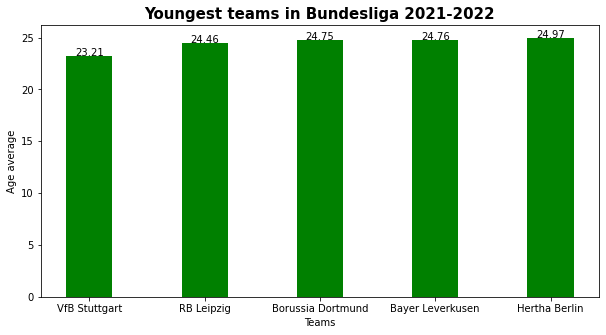

In [39]:
#Taking the 5 youngest teams
df7=df6.head(5)

#creating a bar plot showing the 5 youngest teams
teams = list(df7.keys())
age= list(df7.values) 
plt.figure(figsize= (10,5))
bars=plt.bar(teams,height=age,color='green',width=0.40)

#show values at the top of each bar
for bar in bars:
    yval =bar.get_height()
    plt.text(x=bar.get_x()+ bar.get_width()/2, y=yval+0.005,s=yval, ha='center')


#setting axis and chart titles
plt.xlabel("Teams")
plt.ylabel("Age average")
plt.title("Youngest teams in Bundesliga 2021-2022",size=15,fontweight='bold')
plt.show()

**VfB Stuttgart** had the youngest group of players for the 2021-2022 Bundelsiga season with an age average of **23.21**. Among the top 5, we have RB Leipzing **(24.46)** in 2nd followed by Borussia Dortmund **(24.75)**, Bayer Leverkusen **(24.76)** and in 5th Herta Berlin **(24.97)**.

In [40]:
#Selecting the oldest team in Bundelisga 2021-2022
df6.tail(1) #last row of Series


team name
Union Berlin    28.08
Name: age avg, dtype: float64

For the 2021-2022, the oldest group of players in the German league was at **Union Berlin** where the average age was **28.08**. It is almost 5 years older that the youngest group.

### What was the age distribution in Bundesliga in the 2021-2022 season?

In this section, I am going to create 4 age groups and represent the age distribution using a pie chart. The 4 age categories are the following:
*  **Under 20**
*  **20-25**
*  **26-30**
*  **Over 30**


    
 

In [41]:
#dividing dataset based on age groups
U_20=df.loc[df['age']<20]
B_20_25=df.loc[(df['age']>=20) & (df['age']<=25)]
B_26_30=df.loc[(df['age']>25) & (df['age']<=30)]
O_30=df.loc[df['age']>30]

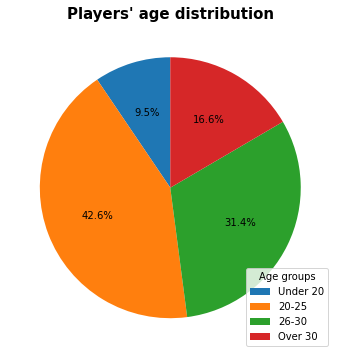

In [42]:
#creating array of values for pie chart
x= np.array([U_20['name'].count(), B_20_25['name'].count(), B_26_30['name'].count(),O_30['name'].count()])
#setting labels for pie chart
agelabels=['Under 20','20-25','26-30', 'Over 30']
#creating the pie chart
plt.figure(figsize=(6,6))
plt.pie(x,autopct="%.1f%%",startangle=90)
plt.legend(agelabels,title='Age groups',loc='lower right')
plt.title("Players' age distribution",size=15,fontweight='bold')
plt.show()

Most players in the Bundesliga 2021-2022 were between 20 and 25 years old (**42.6%**). In second, we have the 26-30 age group with **31.4%**. Following are the players who are older than 30, as they accounted for **16.6%** of the total players. Lastly, **9.5%** of the players have under 20 years of age. 

### Who were the 10 players with the highest goals per game ratio?

In [43]:
#replacing null values with 0
df7=df.replace(np.nan,0)

In order to calculate the goals/game ratio, I am going to need the columns "**total goals**", "**appearances**" but also "**Team 2.total goals**" and "**Team 2.appearances**". The latter two contains null values because only a couple of the players played for two different teams during the season. Having these null values can prevent me to do some operations or I can have inaccurate results. Therefore, I replaced null values with 0 in a copy (df7) of the original dataset.

In [44]:
#columns appearances and total goals have int dtype
#setting their twin columns' data to int
df7['Team 2.appearances']=df7['Team 2.appearances'].astype('int64')
df7['Team 2.total goals']=df7['Team 2.total goals'].astype('int64')

In [45]:
#calculating goals/per game ratio
df7['goals per game']=(df7['total goals']+df7['Team 2.total goals'])/(df7['appearances']+df7['Team 2.appearances'])

In [46]:
#taking subset of dataframe
df8=df7[['name','team name','appearances','total goals','Team 2.team name','Team 2.appearances','Team 2.total goals','goals per game']]

In [47]:
#taking players with minimum 17 games played
df9=df8.loc[df8['appearances']+ df8['Team 2.appearances']>=17]

I am going to calculate the goals per game average based on players who played 17 games (half of season games) or more to avoid results being skewed. For instance, a player who played  2 games and scored a goal has an avergae of 0.5 a game and might end up in the top 10 goals/game ratio, above players who have played way more games. 

In [48]:
#sorting df9 by 'goals per game' in descending order
df10=df9.sort_values(by=['goals per game'],ascending=False)

In [50]:
#set columns values where it is 0 to null
df10['Team 2.appearances'].mask(df10['Team 2.appearances'] == 0,np.nan, inplace=True)
df10['Team 2.total goals'].mask(df10['Team 2.total goals'] == 0,np.nan, inplace=True)
df10['Team 2.team name'].mask(df10['Team 2.team name'] == 0,np.nan, inplace=True)

In [51]:
#rounding to 2 decimals for values in goals/game column
df10['goals per game']=df10['goals per game'].round(2)

In [52]:
#taking the top 10 goals/game ratio
df10.head(10)

,name,team name,appearances,total goals,Team 2.team name,Team 2.appearances,Team 2.total goals,goals per game
109,R. Lewandowski,Bayern Munich,34,35,NaN,NaN,NaN,1.03
136,E. Håland,Borussia Dortmund,24,22,NaN,NaN,NaN,0.92
62,P. Schick,Bayer Leverkusen,27,24,NaN,NaN,NaN,0.89
237,A. Modeste,FC Koln,32,20,NaN,NaN,NaN,0.62
339,C. Nkunku,RB Leipzig,34,20,NaN,NaN,NaN,0.59
403,Taiwo Micheal Awoniyi,Union Berlin,31,15,NaN,NaN,NaN,0.48
159,J. Hofmann,Borussia Monchengladbach,26,12,NaN,NaN,NaN,0.46
94,S. Gnabry,Bayern Munich,34,14,NaN,NaN,NaN,0.41
86,Moussa Diaby,Bayer Leverkusen,32,13,NaN,NaN,NaN,0.41
496,Max Bennet Kruse,VfL Wolfsburg,14,7,Union Berlin,16.0,5.0,0.40


The table above shows the 10 players who had the highest goals/appearances ratio for the 2021-2022 Bundesliga season. Robert Lewandowski leads this ranking with a ratio of **1.03** goals per game after scoring 35 goals in 34 games played.

### Which 5 teams scored the most goals? And which 5 teams scored the least goals?

In [53]:
#sum of goals by team
df11=df.groupby('team name')['total goals'].sum()
df11

team name
1899 Hoffenheim             55
Arminia Bielefeld           26
Bayer Leverkusen            76
Bayern Munich               92
Borussia Dortmund           81
Borussia Monchengladbach    54
Eintracht Frankfurt         42
FC Augsburg                 39
FC Koln                     52
FSV Mainz 05                49
Hertha Berlin               35
RB Leipzig                  72
SC Freiburg                 55
SpVgg Greuther Furth        26
Union Berlin                45
VfB Stuttgart               37
VfL BOCHUM                  37
VfL Wolfsburg               42
Name: total goals, dtype: int64

In [54]:
df12=df.loc[df['Team 2.total goals']>=0]
#taking goals scored from Team2 columns
df13=df12.groupby('Team 2.team name')['Team 2.total goals'].sum()

In [55]:
df14=df13.astype('int64')
df14

Team 2.team name
Bayern Munich        0
Borussia Dortmund    0
FSV Mainz 05         0
Hertha Berlin        1
RB Leipzig           0
SC Freiburg          0
Union Berlin         5
VfB Stuttgart        0
VfL Wolfsburg        0
Name: Team 2.total goals, dtype: int64

Above, I see that I need to add 5 goals to Union Berlin's goals in df11 and 1 goal to Hertha Berlin. I am going to have to concatenate Series df11 with the Series of 'Team2' (df14). But the latter Series does not have the same indexes (rows) as df11 so I have to reindex it and set null values to 0.

In [56]:
df11.index

Index(['1899 Hoffenheim', 'Arminia Bielefeld', 'Bayer Leverkusen',
       'Bayern Munich', 'Borussia Dortmund', 'Borussia Monchengladbach',
       'Eintracht Frankfurt', 'FC Augsburg', 'FC Koln', 'FSV Mainz 05',
       'Hertha Berlin', 'RB Leipzig', 'SC Freiburg', 'SpVgg Greuther Furth',
       'Union Berlin', 'VfB Stuttgart', 'VfL BOCHUM', 'VfL Wolfsburg'],
      dtype='object', name='team name')

In [57]:
#reindexing df14 with the same indexes as df11
df15=df14.reindex(['1899 Hoffenheim', 'Arminia Bielefeld', 'Bayer Leverkusen',
       'Bayern Munich', 'Borussia Dortmund', 'Borussia Monchengladbach',
       'Eintracht Frankfurt', 'FC Augsburg', 'FC Koln', 'FSV Mainz 05',
       'Hertha Berlin', 'RB Leipzig', 'SC Freiburg', 'SpVgg Greuther Furth',
       'Union Berlin', 'VfB Stuttgart', 'VfL BOCHUM', 'VfL Wolfsburg'])
df15

Team 2.team name
1899 Hoffenheim             NaN
Arminia Bielefeld           NaN
Bayer Leverkusen            NaN
Bayern Munich               0.0
Borussia Dortmund           0.0
Borussia Monchengladbach    NaN
Eintracht Frankfurt         NaN
FC Augsburg                 NaN
FC Koln                     NaN
FSV Mainz 05                0.0
Hertha Berlin               1.0
RB Leipzig                  0.0
SC Freiburg                 0.0
SpVgg Greuther Furth        NaN
Union Berlin                5.0
VfB Stuttgart               0.0
VfL BOCHUM                  NaN
VfL Wolfsburg               0.0
Name: Team 2.total goals, dtype: float64

In [58]:
#replacing df15 null values with 0 and changing dtype
df15.replace(np.nan,0,inplace=True)
df16=df15.astype('int64')
df16

Team 2.team name
1899 Hoffenheim             0
Arminia Bielefeld           0
Bayer Leverkusen            0
Bayern Munich               0
Borussia Dortmund           0
Borussia Monchengladbach    0
Eintracht Frankfurt         0
FC Augsburg                 0
FC Koln                     0
FSV Mainz 05                0
Hertha Berlin               1
RB Leipzig                  0
SC Freiburg                 0
SpVgg Greuther Furth        0
Union Berlin                5
VfB Stuttgart               0
VfL BOCHUM                  0
VfL Wolfsburg               0
Name: Team 2.total goals, dtype: int64

In [59]:
#concatenating two Series 
df17=df11+df16
#sorting Series in ascending order
df17.sort_values(ascending=True,inplace=True)

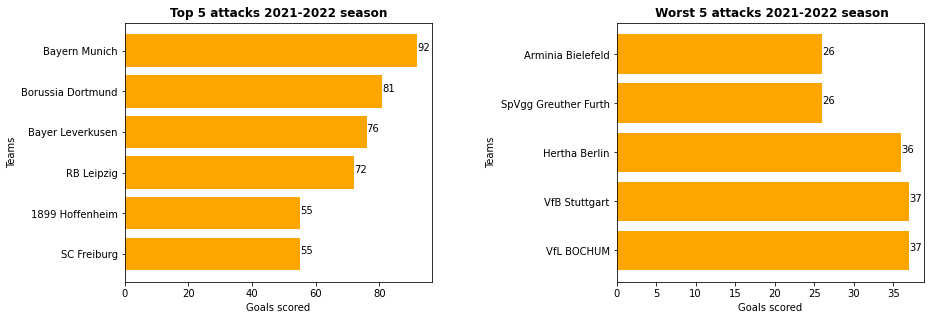

In [60]:
#Drawing two bar plots side by side using subplot

#First subplot
top5=df17.tail(6) #top 5 attacks
x=list(top5.keys())
y=list(top5.values)
plt.subplot(1,2,1)
bars=plt.barh(x,y, color='Orange')

for index, value in enumerate(y):
    plt.text(value, index, str(value))

    
plt.xlabel("Goals scored")
plt.ylabel("Teams")
plt.title("Top 5 attacks 2021-2022 season",size=12,fontweight='bold')

#Second subplot
df17_d=df17.sort_values(ascending=False)
last5=df17_d.tail(5)#worst 5 attacks
x1=list(last5.keys())
y1=list(last5.values)
plt.subplot(1,2,2)
bars=plt.barh(x1,y1, color='Orange')

for index, value in enumerate(y1):
    plt.text(value, index, str(value))

plt.xlabel("Goals scored")
plt.ylabel("Teams")
plt.title(" Worst 5 attacks 2021-2022 season",size=12,fontweight='bold')


#set spacing between subplots and display them
plt.subplots_adjust(left=0.1,bottom=0.1,right=1.95,top=1,wspace=0.6, hspace=1)
plt.show()

### Which 5 teams conceded the least goals ? And which 5 teams have allowed the most goals?

In [61]:
#take the rows where position is goalkeeper
#These are the rows for which there is a value for the column goals conceded
df18=df.loc[df['position']=='Goalkeeper']

In [62]:
#sum of goals conceded by team
df19=df18.groupby('team name')['goals conceded'].sum()

In [63]:
#sort in descending order
df19.sort_values(ascending=False,inplace=True)

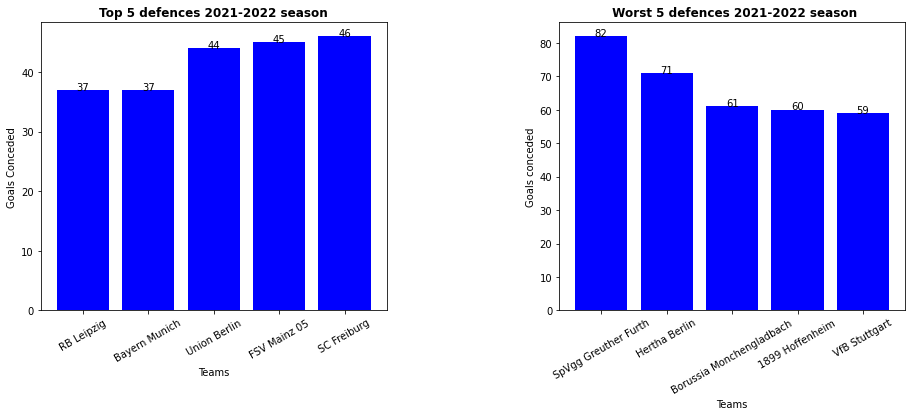

In [64]:
#Drawing two bar plots side by side using subplot

#set subplots sizes
fig, ax = plt.subplots(1, 2, figsize=(15,5))

#First subplot
df19_a=df19.sort_values() #ascending order
top5=df19_a[1:6] #top 5 defences
x=list(top5.keys())
y=list(top5.values)
plt.subplot(1,2,1)
bars=plt.bar(x,y, color='Blue')

#show values at the top of each bar
for bar in bars:
    yval =bar.get_height()
    plt.text(x=bar.get_x()+ bar.get_width()/2, y=yval+0.005,s=yval, ha='center')

    
plt.xlabel("Teams")
plt.xticks(rotation=30)#rotate x-axis labels by 30 degree
plt.ylabel("Goals Conceded")
plt.title("Top 5 defences 2021-2022 season",size=12,fontweight='bold')

#Second subplot
last5=df19.head(5)#worst 5 defences
x1=list(last5.keys())
y1=list(last5.values)
plt.subplot(1,2,2)
bars=plt.bar(x1,y1, color='Blue')


for bar in bars:
    yval =bar.get_height()
    plt.text(x=bar.get_x()+ bar.get_width()/2, y=yval+0.005,s=yval, ha='center')

plt.xlabel("Teams")
plt.xticks(rotation=30)
plt.ylabel("Goals conceded")
plt.title(" Worst 5 defences 2021-2022 season",size=12,fontweight='bold')


#set spacing between subplots and display them
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.5, hspace=0.5)
plt.show()

For the first barplot (on the left), I excluded the first value in df19_a which was FC Köln with 28 goals. I was surprised by this fact and I researched the Bundelisga statistics on the web. I saw that FC Köln conceded 49 goals. I filtered the dataset and I saw that there was a goalkeeper (Marvin Schwäbe) who conceded 28 goals in 21 appearances. However, there was another goalkeeper (Timo Horn) who played for FC Köln during the season and was not in the dataset. He played 12 games and conceded 21 goals, which means that FC Köln conceded 49 if you add the 28 conceded by the first goalkeeper. Therefore, it is actually **RB Leipzig** and **Bayern Munich** that have conceded the least goals (**37**).

### Who are the 15 players in the Bundesliga with the highest percentage of successful dribbles in the 2021-2022 season?

I am going to determine players'successful dribbles percentage for players who attempted at least **70 dribbles attempted**. The more dribbles you attempt, the lower your percentage will be. Moreover, only evaluating players with 70 dribbles is going to allow me to work on non null values. Indeed, I noticed in the Excel file that some data is missing or is unavailable for columns 'dribbles attempted' and 'dribbles success' (columns needed to calculate success %). And for most players that have under 10 dribbles attempted, I noticed that the column 'dribbles success' was null. 

In [65]:
#replacing null values with 0 to be able to do operations
df['dribbles attempts']=df['dribbles attempts'].replace(np.nan,0)
df['dribbles success']=df['dribbles success'].replace(np.nan,0)
df['Team 2.dribbles attempts']=df['Team 2.dribbles attempts'].replace(np.nan,0)
df['Team 2.dribbles success']=df['Team 2.dribbles success'].replace(np.nan,0)

In [66]:
#create the 'successful dribbles percentage' column
df['SD_percentage']=((df['dribbles success']+df['Team 2.dribbles success'])/(df['dribbles attempts']+df['Team 2.dribbles attempts']))*100
df['SD_percentage']=df['SD_percentage'].round(2)

In [67]:
#selecting players with at least 70 dribbles attempted
df20=df.loc[(df['dribbles attempts'] + df['Team 2.dribbles attempts']>=70)]

In [68]:
#sorting df by column SD_percentage in descending order 
df21=df20.sort_values(by='SD_percentage',ascending=False)

In [69]:
#set columns Team 2 back to nan for rows with value 0
df21['Team 2.dribbles attempts'].mask(df21['Team 2.dribbles attempts'] == 0.0,np.nan, inplace=True)
df21['Team 2.dribbles success'].mask(df21['Team 2.dribbles success'] == 0.0,np.nan, inplace=True)

In [70]:
#subset columns and display top 15 lines
df21[['name','position','team name','dribbles attempts','dribbles success','Team 2.dribbles attempts','Team 2.dribbles success','SD_percentage']].head(15)

,name,position,team name,dribbles attempts,dribbles success,Team 2.dribbles attempts,Team 2.dribbles success,SD_percentage
153,K. Koné,Midfielder,Borussia Monchengladbach,92.0,67.0,NaN,NaN,72.83
339,C. Nkunku,Midfielder,RB Leipzig,99.0,66.0,NaN,NaN,66.67
83,Florian Richard Wirtz,Attacker,Bayer Leverkusen,85.0,55.0,NaN,NaN,64.71
93,A. Davies,Defender,Bayern Munich,125.0,80.0,NaN,NaN,64.00
94,S. Gnabry,Midfielder,Bayern Munich,104.0,63.0,NaN,NaN,60.58
82,J. Frimpong,Defender,Bayer Leverkusen,79.0,47.0,NaN,NaN,59.49
281,Suat Serdar,Midfielder,Hertha Berlin,103.0,61.0,NaN,NaN,59.22
432,O. Mangala,Midfielder,VfB Stuttgart,73.0,43.0,NaN,NaN,58.90
109,R. Lewandowski,Attacker,Bayern Munich,82.0,48.0,NaN,NaN,58.54
146,J. Bellingham,Midfielder,Borussia Dortmund,96.0,55.0,NaN,NaN,57.29
